<a href="https://colab.research.google.com/github/jonnes-nascimento/machine_learning/blob/master/IC_USJT_2020_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Iniciação Científica USJT 2020 - COVID-19 (Brasil)


In [2]:
import pandas as pd

# importando o dataset
uri_dados = 'https://gist.githubusercontent.com/jonnes-nascimento/cb2cf5b04eabedc05203c9f7defbdeca/raw/bd47df36becb1ba153b8db6a0f12d97fde656cfc/brazil_covid19.csv'

dados = pd.read_csv(uri_dados)
#dados = pd.read_csv(uri_dados, parse_dates=['date'], date_parser=lambda x: pd.to_datetime(x, format='%Y/%m/%d'))

# renomeando as colunas
dados.columns = ['data', 'regiao', 'estado', 'n_casos', 'n_mortes']

# converte a coluna data para o tipo datetime
dados['data'] = pd.to_datetime(dados['data'], format='%Y-%m-%d')

# exibe o tipo de dado de cada coluna do datadrame
#dados.dtypes

# extrai o mes e ano da data em novas colunas
dados['mes'] = pd.DatetimeIndex(dados['data']).month
dados['ano'] = pd.DatetimeIndex(dados['data']).year

a_substituir = {
    1 : 'Janeiro',
    2 : 'Fevereiro',
    3 : 'Março',
    4 : 'Abril',
    5 : 'Maio',
    6 : 'Junho',
    7 : 'Julho',
    8 : 'Agosto',
    9 : 'Setembro',
    10 : 'Outubro',
    11 : 'Novembro',
    12 : 'Dezembro'
}

dados['mes_descr'] = dados['mes'].map(a_substituir)

# exibe os 5 primeiros registros do dataframe
dados.head()

,data,regiao,estado,n_casos,n_mortes,mes,ano,mes_descr
0,2020-01-30,Centro-Oeste,Distrito Federal,0,0,1,2020,Janeiro
1,2020-01-30,Centro-Oeste,Goiás,0,0,1,2020,Janeiro
2,2020-01-30,Centro-Oeste,Mato Grosso,0,0,1,2020,Janeiro
3,2020-01-30,Centro-Oeste,Mato Grosso do Sul,0,0,1,2020,Janeiro
4,2020-01-30,Nordeste,Alagoas,0,0,1,2020,Janeiro


In [3]:
# agrupando os dados e analisando a quantidade de casos por por mês, ano e por região
casos_regiao_mes = dados.groupby(['regiao', 'mes_descr', 'mes', 'ano'], as_index=False)['n_casos'].sum()

# agrupando os dados e analisando a quantidade de mortes por por mês, ano e por região
mortes_regiao_mes = dados.groupby(['regiao', 'mes_descr', 'mes', 'ano'], as_index=False)['n_mortes'].sum()
mortes_regiao_mes.sort_values('mes')

,regiao,mes_descr,mes,ano,n_mortes
12,Norte,Janeiro,1,2020,0
2,Centro-Oeste,Janeiro,1,2020,0
22,Sul,Janeiro,1,2020,0
7,Nordeste,Janeiro,1,2020,0
17,Sudeste,Janeiro,1,2020,0
1,Centro-Oeste,Fevereiro,2,2020,0
21,Sul,Fevereiro,2,2020,0
6,Nordeste,Fevereiro,2,2020,0
16,Sudeste,Fevereiro,2,2020,0
11,Norte,Fevereiro,2,2020,0


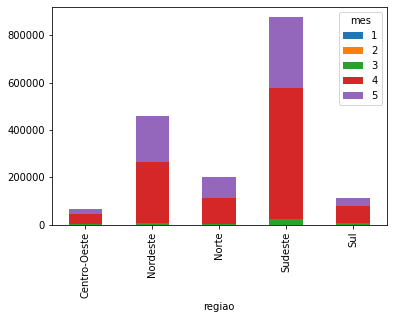

In [4]:
# análise gráfica da quantidade de casos por região, mês e ano
casos_regiao_mes.pivot(index = 'regiao', columns='mes', values='n_casos').plot(kind='bar', stacked=True)

In [11]:
print('Número de casos: %d' % dados['n_casos'].sum())

Número de casos: 1711605


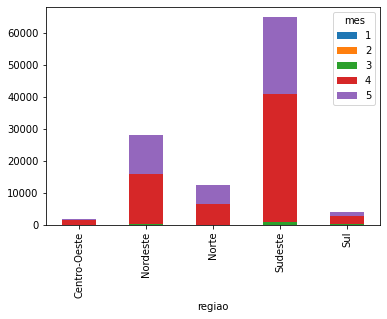

In [5]:
# análise gráfica da quantidade de mortes por região, mês e ano
mortes_regiao_mes.pivot(index = 'regiao', columns='mes', values='n_mortes').plot(kind='bar', stacked=True)

In [12]:
print('Número de mortes: %d' % dados['n_mortes'].sum())

Número de mortes: 110841
